# Clase 6:	Generación de números aleatorios y simulación Montecarlo

[Juan Diego Sánchez Torres](https://www.researchgate.net/profile/Juan_Diego_Sanchez_Torres), 

*Profesor*, [MAF ITESO](http://maf.iteso.mx/web/general/detalle?group_id=5858156)

+ Departamento de Matemáticas y Física
+ dsanchez@iteso.mx
+ Tel. 3669-34-34 Ext. 3069
+ Oficina: Cubículo 4, Edificio J, 2do piso

# 1. Motivación

Presentar los métodos básicos para la generación de números aleatorios uniformes y normales.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# 2. Generador congruencial lineal

In [2]:
def lcg(n, m=2**31-1, a=16807, c=0, seed=2**30):
    x = np.zeros(n+1)
    x[0]=seed
    for i in range(1,n+1):
        x[i] = (a * x[i-1]+c)%m
    return x[1:]/m

**Ejemplo**

In [3]:
lcg(10, m=31, a=13, c=0, seed=3)

array([ 0.25806452,  0.35483871,  0.61290323,  0.96774194,  0.58064516,
        0.5483871 ,  0.12903226,  0.67741935,  0.80645161,  0.48387097])

**Generador mínimo estándar**

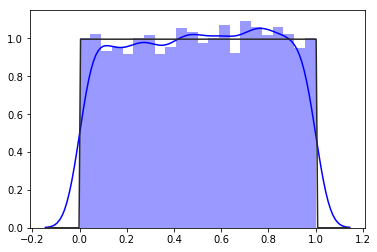

In [4]:
x=lcg(10000)
sns.distplot(x, color="b", fit=stats.uniform);

**Generado Randu (Usado por IBM)**

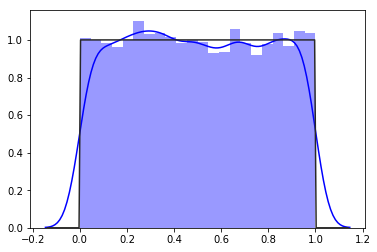

In [5]:
x=lcg(10000, m=2**31, a=2**16+3, c=0, seed=3)
sns.distplot(x, color="b", fit=stats.uniform);

# 3. Método de Box-Muller

In [6]:
def bm(n):
    m=2**31-1
    a=16807
    c=0
    seed=2**30
    x = np.zeros(n+1)
    x[0]=seed
    for i in range(1,n+1):
        x[i] = (a * x[i-1]+c)%m
    u=x[1:]/m
    u1=u[:int((n/2))]
    u2=u[int(n/2):]
    nn=np.concatenate((np.sqrt(-2*np.log(1-u1))*np.cos(2*np.pi*u2), np.sqrt(-2*np.log(1-u1))*np.sin(2*np.pi*u2)),axis=0)
    return nn

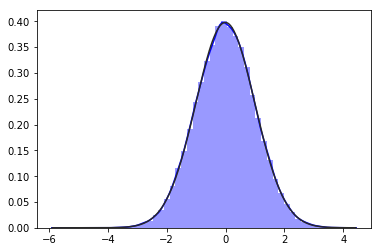

In [7]:
y=bm(100000)
sns.distplot(y, color="b", fit=stats.norm);